In [47]:
import matplotlib.pyplot as m
import numpy as n
import pandas as p


age = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 26, 32, 37, 42, 47, 52, 58, 63, 67, 72]
bp = [110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
col = [160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270]
y = [10, 15, 25, 35, 45, 55, 65, 70, 80, 90, 12, 20, 30, 40, 50, 60, 70, 85, 95, 98]
age = n.array(age)
bp = n.array(bp)
col = n.array(col)
y = n.array(y)

age = (age - n.min(age)) / (n.max(age) - n.min(age))
bp = (bp - n.min(bp)) / (n.max(bp) - n.min(bp))
col = (col - n.min(col)) / (n.max(col) - n.min(col))
y = (y - n.min(y)) / (n.max(y) - n.min(y))

print(age)
print(bp)
print(col)
print(y)

[0.         0.10638298 0.21276596 0.31914894 0.42553191 0.53191489
 0.63829787 0.74468085 0.85106383 0.95744681 0.0212766  0.14893617
 0.25531915 0.36170213 0.46808511 0.57446809 0.70212766 0.80851064
 0.89361702 1.        ]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.         0.         0.11111111
 0.22222222 0.33333333 0.44444444 0.55555556 0.66666667 0.77777778
 0.88888889 1.        ]
[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.18181818 0.27272727
 0.36363636 0.45454545 0.54545455 0.63636364 0.72727273 0.81818182
 0.90909091 1.        ]
[0.         0.05681818 0.17045455 0.28409091 0.39772727 0.51136364
 0.625      0.68181818 0.79545455 0.90909091 0.02272727 0.11363636
 0.22727273 0.34090909 0.45454545 0.56818182 0.68181818 0.85227273
 0.96590909 1.        ]


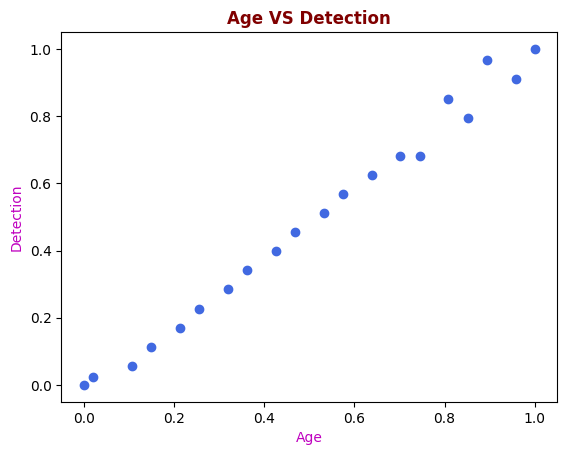

In [48]:
m.scatter(age,y,color="royalblue")
m.xlabel("Age",color='m')
m.ylabel("Detection",color='m')
m.title("Age VS Detection",weight='bold',color='maroon')
m.show()

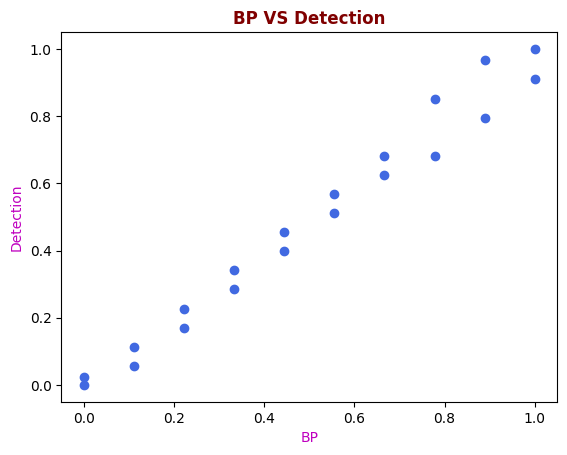

In [49]:
m.scatter(bp,y,color="royalblue")
m.xlabel("BP",color='m')
m.ylabel("Detection",color='m')
m.title("BP VS Detection",weight='bold',color='maroon')
m.show()

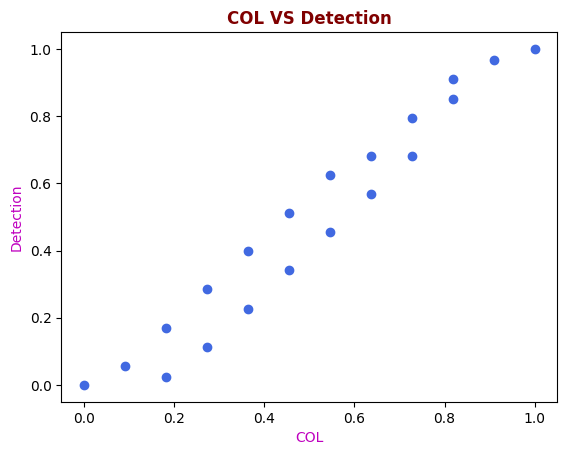

In [50]:
m.scatter(col,y,color="royalblue")
m.xlabel("COL",color='m')
m.ylabel("Detection",color='m')
m.title("COL VS Detection",weight='bold',color='maroon')
m.show()

In [67]:
w1=0
w2=0
w3=0
b=0
lr=0.001

In [53]:
def predict(x1,x2,x3,w1,w2,w3,b):
  return (x1*w1 + x2*w2 + x3*w3 +b)

def cost_func(x1,x2,x3,w1,w2,w3,b,y):
  y2=predict(x1,x2,x3,w1,w2,w3,b)
  mse=(y2-y)**2
  return n.mean(mse)


In [54]:
print(cost_func(age,bp,col,w1,w2,w3,b,y))



0.33411673553719007


In [55]:
def update(age,col,bp,y,w1,w2,w3,b,lr):
  dLdW=n.mean(-2*age*(y-predict(age,bp,col,w1,w2,w3,b)))
  dLdW2=n.mean(-2*bp*(y-predict(age,bp,col,w1,w2,w3,b)))
  dLdW3=n.mean(-2*col*(y-predict(age,bp,col,w1,w2,w3,b)))
  dLdb=n.mean(-2*(y-predict(age,bp,col,w1,w2,w3,b)))

  w1=w1-lr*dLdW
  w2=w2-lr*dLdW2
  w3=w3-lr*dLdW3
  b=b-lr*dLdb
  return w1,w2,w3,b

In [56]:
update(age,col,bp,y,w1,w2,w3,b,lr)

(0.0067971470019342365,
 0.006833333333333333,
 0.006541322314049587,
 0.009659090909090909)

In [58]:
def train(age,bp,col,y,w1,w2,w3,b,lr,tol=1e-13,n_epochs=100, verbose=False):
  weights1=[w1]
  weights2=[w2]
  weights3=[w3]
  biases=[b]
  costs=[]

  ct=1
  while True:
    cost=cost_func(age,bp,col,w1,w2,w3,b,y)
    costs.append(cost)
    if len(costs)>1 and abs(costs[-2]-costs[-1]) < tol:
      break

    w1,w2,w3,b=update(age,bp,col,y,w1,w2,w3,b,lr)
    #print(w1," ",ct)
    weights1.append(w1)
    weights2.append(w2)
    weights3.append(w3)
    biases.append(b)

    if verbose and ct %   n_epochs ==0:
      print("After ",ct," :- W1= ",w1," :- W2= ",w2," :- W3= ",w3," b= ",b," cost= ",cost)
    ct+=1

  return weights1,weights2,weights3,biases,costs



In [70]:
w1,w2,w3,b,c=train(age,bp,col,y,w1,w2,w3,b,lr,verbose=True)

ValueError: operands could not be broadcast together with shapes (20,) (351981,) 

In [69]:
a=[w1[0],w2[0],w3[0],b[0],c[0]]
b=[w1[-1],w2[-1],w3[-1],b[-1],c[-1]]
d=p.DataFrame(list(zip(a,b)),
              columns=['Initial','Final'],
              index=['W1','W2','W3','b','Cost'])
d

,Initial,Final
W1,0.000000,0.375371
W2,0.000000,0.343204
W3,0.000000,0.339995
b,0.000000,-0.046730
Cost,0.334117,0.000696


In [ ]:
m.figure(figsize=(5))